# Loading Data + Cleaning

In [38]:
import pandas as pd

patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')
allergies = pd.read_csv('allergies.csv')
patients

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,999-94-9633,S99930485,X51431379X,Mrs.,Nikita578,Erdman779,NaN,...,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,2186.0,42.290937,-70.975503,1.382106e+06,390849.2625
1,c06a2ab3-c3b1-a3d0-7c12-262a12c6885e,1936-07-03,NaN,999-76-5032,S99927160,X37795263X,Mr.,Miguel Ángel46,Atencio773,NaN,...,San Jose San Jose CR,1022 Hermann Quay Suite 79,Springfield,Massachusetts,Hampden County,1118.0,42.119725,-72.529805,2.118565e+06,108146.8010
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,999-83-7940,S99932661,X36822066X,Mr.,Zane918,Hodkiewicz467,NaN,...,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162,2.007909e+06,333884.4150
3,94d39619-8e17-d248-41b3-9ec1f2d031b2,1954-11-08,2010-01-10,999-84-3708,S99923522,X49705907X,Mr.,Emmett200,Collins926,NaN,...,Baldwinville Massachusetts US,675 Ortiz Mission Unit 59,Hingham,Massachusetts,Plymouth County,2043.0,42.257452,-70.848673,2.637311e+06,149574.3525
4,23832f5d-e045-2541-1626-a65dce9bbcf7,1972-04-13,NaN,999-89-5858,S99939931,X88479701X,Mrs.,Magan944,Green467,NaN,...,Worcester Massachusetts US,427 Jakubowski Viaduct Unit 76,Edgartown,Massachusetts,Dukes County,NaN,41.364910,-70.519177,1.859584e+06,69524.1780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15349,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,999-50-6686,S99929386,X5051881X,Mrs.,Melaine933,Hintz995,NaN,...,Southwick Massachusetts US,382 Mosciski Road,Boston,Massachusetts,Suffolk County,2128.0,42.357333,-71.057372,2.706479e+06,601707.4785
15350,226e72cc-aa14-bbe5-9643-5a5a25035b1c,1966-11-23,NaN,999-86-5987,S99954452,X20867678X,Mr.,Omer483,Stamm704,NaN,...,Dunstable Massachusetts US,368 Jaskolski Bypass Unit 98,Arlington,Massachusetts,Middlesex County,NaN,42.385808,-71.193809,4.110719e+05,182.0625
15351,5e6397e9-a5e9-1407-2847-d512aeab7f5e,1935-01-25,NaN,999-86-7977,S99917636,X1873171X,Mrs.,Merilyn246,Heidenreich818,NaN,...,Salisbury Massachusetts US,867 Zulauf Ville Apt 41,Whitman,Massachusetts,Plymouth County,NaN,42.075561,-70.958799,2.683450e+06,128001.1505
15352,8743dc3b-9fe5-176b-652e-fde2ef00a27c,1943-09-12,NaN,999-47-6448,S99986245,X81470353X,Mr.,Derrick232,Becker968,NaN,...,Southbridge Massachusetts US,1061 Skiles Pathway Unit 29,Waltham,Massachusetts,Middlesex County,NaN,42.395610,-71.280002,1.904166e+06,43049.9680


In [39]:
medications = medications.rename(columns={'REASONDESCRIPTION': 'diagnosis'})
patients = patients.rename(columns={'RACE': 'race'})
patients = patients.rename(columns={'GENDER': 'gender'})
allergies = allergies.rename(columns={'DESCRIPTION': 'allergy'})

data = patients.merge(medications[['PATIENT', 'diagnosis']], left_on='Id', right_on='PATIENT', how='inner')
data = data.merge(allergies[['PATIENT','allergy']],on='PATIENT', how='inner')

df = data[['Id','gender', 'race','diagnosis','allergy']]
df

,Id,gender,race,diagnosis,allergy
0,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,Mold (organism)
1,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,House dust mite (organism)
2,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,Animal dander (substance)
3,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,Tree pollen (substance)
4,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,Eggs (edible) (substance)
...,...,...,...,...,...
484599,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,NaN,Shellfish (substance)
484600,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,Hypertension,Animal dander (substance)
484601,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,Hypertension,Shellfish (substance)
484602,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,NaN,Animal dander (substance)


In [40]:
df[df.isnull().any(axis=1)]

,Id,gender,race,diagnosis,allergy
0,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,Mold (organism)
1,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,House dust mite (organism)
2,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,Animal dander (substance)
3,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,Tree pollen (substance)
4,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,NaN,Eggs (edible) (substance)
...,...,...,...,...,...
484597,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,NaN,Shellfish (substance)
484598,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,NaN,Animal dander (substance)
484599,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,NaN,Shellfish (substance)
484602,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,NaN,Animal dander (substance)


In [41]:
df = df.dropna()
df

,Id,gender,race,diagnosis,allergy
8,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,Hyperlipidemia,Mold (organism)
9,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,Hyperlipidemia,House dust mite (organism)
10,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,Hyperlipidemia,Animal dander (substance)
11,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,Hyperlipidemia,Tree pollen (substance)
12,0a859c31-a1e5-03ee-7e60-c3661644185f,F,black,Hyperlipidemia,Eggs (edible) (substance)
...,...,...,...,...,...
484583,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,Hyperlipidemia,Shellfish (substance)
484594,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,Hypertension,Animal dander (substance)
484595,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,Hypertension,Shellfish (substance)
484600,255b447b-d5ec-bc1d-f91f-5aede8ea193d,F,white,Hypertension,Animal dander (substance)


## Visualizations and Correlations

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

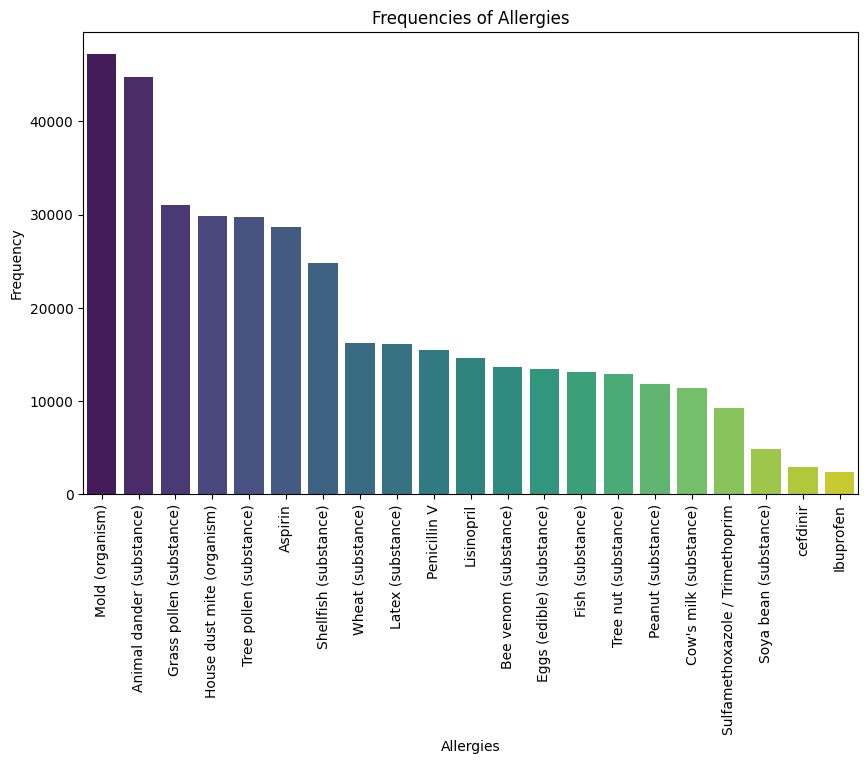

In [43]:
diagnosis_freq_df = diagnosis_freq.reset_index()
diagnosis_freq_df.columns = ['allergy', 'frequency']

plt.figure(figsize=(10, 6))
sns.barplot(data=diagnosis_freq_df, x='allergy', y='frequency', palette='viridis', hue='allergy', dodge=False)
plt.xlabel('Allergies')
plt.ylabel('Frequency')
plt.title('Frequencies of Allergies')
plt.xticks(rotation=90)
plt.show()


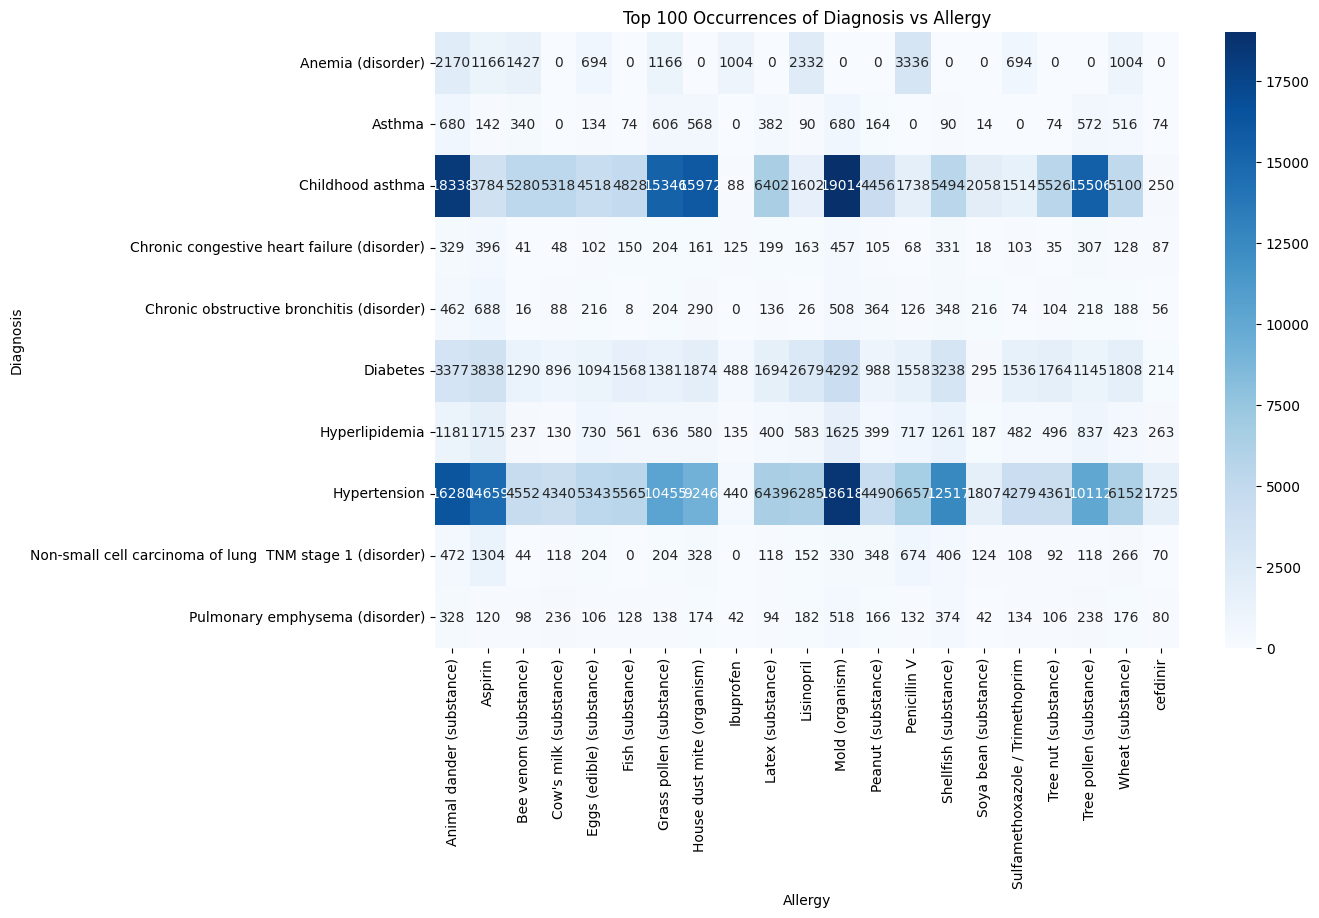

In [44]:
cross_tab = pd.crosstab(index=df['diagnosis'], columns=df['allergy'])

top_100 = cross_tab.unstack().sort_values(ascending=False)[:100]

top_100_diagnosis = top_100.index.get_level_values('diagnosis').tolist()
top_100_allergies = top_100.index.get_level_values('allergy').tolist()

filtered_data = df[(df['diagnosis'].isin(top_100_diagnosis)) & (df['allergy'].isin(top_100_allergies))]

filtered_cross_tab = pd.crosstab(index=filtered_data['diagnosis'], columns=filtered_data['allergy'])

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Top 100 Occurrences of Diagnosis vs Allergy')
plt.xlabel('Allergy')
plt.ylabel('Diagnosis')
plt.show()


# Splitting Training and Testing

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df.loc[:,'gender'] = label_encoder.fit_transform(df['gender'])
df.loc[:,'race'] = label_encoder.fit_transform(df['race'])
df.loc[:,'diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
print(df.head())

                                      Id gender race diagnosis  \
8   0a859c31-a1e5-03ee-7e60-c3661644185f      0    1        21   
9   0a859c31-a1e5-03ee-7e60-c3661644185f      0    1        21   
10  0a859c31-a1e5-03ee-7e60-c3661644185f      0    1        21   
11  0a859c31-a1e5-03ee-7e60-c3661644185f      0    1        21   
12  0a859c31-a1e5-03ee-7e60-c3661644185f      0    1        21   

                       allergy  
8              Mold (organism)  
9   House dust mite (organism)  
10   Animal dander (substance)  
11     Tree pollen (substance)  
12   Eggs (edible) (substance)  


In [47]:
from sklearn.model_selection import train_test_split

predictors = df[['diagnosis', 'race','gender']]
target = df['allergy']

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

print(predictors_train.shape)
print(predictors_test.shape)


(315248, 3)
(78812, 3)


# Models

In [48]:
model.fit(predictors_train, target_train)

LogisticRegression(max_iter=100000)

In [49]:
predictions = model.predict(predictors_test)
predictions

array(['Mold (organism)', 'Grass pollen (substance)',
       'Animal dander (substance)', ..., 'Animal dander (substance)',
       'Animal dander (substance)', 'Mold (organism)'], dtype=object)

In [50]:
predictors_test["predictions"] = predictions
predictors_test["allergy"] = df['allergy']
predictors_test

,diagnosis,race,gender,predictions,allergy
372333,10,0,0,Mold (organism),Eggs (edible) (substance)
378678,1,1,1,Grass pollen (substance),Grass pollen (substance)
437111,6,5,1,Animal dander (substance),Grass pollen (substance)
327147,22,5,0,Mold (organism),Fish (substance)
77254,22,5,1,Mold (organism),Animal dander (substance)
...,...,...,...,...,...
353398,22,5,1,Mold (organism),Tree pollen (substance)
371986,10,0,0,Mold (organism),Animal dander (substance)
202499,10,4,1,Animal dander (substance),Tree nut (substance)
258355,10,5,1,Animal dander (substance),Tree pollen (substance)


In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df['allergy'])

target_test_encoded = label_encoder.transform(target_test)
predictions_encoded = label_encoder.transform(predictions)

mse = mean_squared_error(target_test_encoded, predictions_encoded)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 72.52231893620261
